In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. EDA

In [2]:
df_train = pd.read_csv('data/fashion_train.csv')

In [3]:
df_train.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,7927,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5212,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,0,0
2,28581,6,0,0,0,0,0,0,0,0,...,141,73,0,0,107,63,0,0,0,0
3,39089,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52059,4,0,0,0,0,0,0,0,0,...,0,0,0,19,35,7,14,0,0,0


In [4]:
df_train_X = df_train.iloc[:, 2:]
df_train_y = df_train.iloc[:,[1]]

In [5]:
df_train_X.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,72,170,...,29,39,45,53,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,0,0,0,0,0,0,0,0,0,150,...,50,15,0,0,0,0,0,0,0,0


In [6]:
df_X_array = np.array(df_train_X)

df_train_X_reshape = np.reshape(df_X_array,[42000,28,28])

print(df_train_X_reshape[1])

[[  0   0   0   0   0   0   0   0   0   3   0   5 144 126 147 153   6   0
    0   1   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   1   0   0   0   0 184 255 210 216 253 122   0
    0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3  75 176 204 120  59 192 207 115 162
   80   9   0   0   0   1   0   0   0   0]
 [  0   0   0   3   0   0  48 143 188 198 173 172 169 209 255 134 129 174
  185 183 152  77   0   0   0   0   0   0]
 [  0   0   0   0   0  97 188 178 168 168 176 177 183 200 166 192 170 163
  163 166 168 171 125   0   0   0   0   0]
 [  0   0   0   0  11 187 181 177 174 173 175 176 172 188 164 182 167 164
  169 166 160 159 162  38   0   0   0   0]
 [  0   0   0   0  97 195 182 181 179 177 175 176 177 190 163 174 166 166
  162 163 161 162 168 112   0   0   0   0]
 [  0   0   0   0 186 186 182 176 177 174 176 175 175 187 161 177 166 162
  169 166 147 160 147 154   0   0   0   0]
 [  0   0   0  48 183 175 181 198 178 178 176 174 176 184 165 17

In [7]:
df_train_y_reshape = np.array(df_train_y)

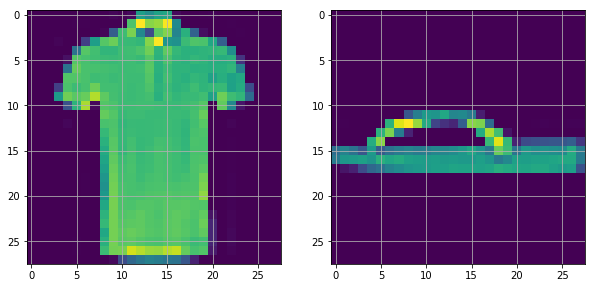

In [8]:
img = df_train_X_reshape[1]
img2 = df_train_X_reshape[3]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.grid(True)
plt.subplot(122)
plt.imshow(img2)
plt.grid(True)


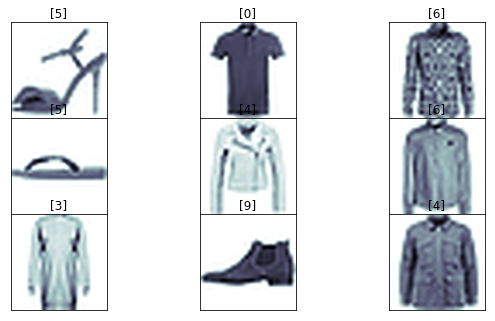

In [9]:
N=3; M=3;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(df_train_X_reshape[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(df_train_y_reshape[k])

    LABELS 설명
   
  0 T-shirt/top  <br> 
 1 Trouser <br> 
 2 Pullover <br> 
 3 Dress <br> 
 4 Coat <br> 
 5 Sandal <br> 
 6 Shirt <br> 
 7 Sneaker <br> 
 8 Bag <br> 
 9 Ankle boot <br> 

In [10]:
df_test = pd.read_csv('data/fashion_test.csv')

## 2.preprocessing

## 2.1 PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(df_train_X)
X_pca

array([[-1251.36735265,   -72.04866684,    54.05654637, ...,
         -124.81310934,   -36.91203738,  -113.03134255],
       [  927.89146147,  -875.37767022,  -243.79740045, ...,
           22.00126218,   -85.38355343,   117.71915459],
       [  552.52306895,    51.71886747,   656.35513752, ...,
          207.65502562,    98.72228145,  -139.46832906],
       ..., 
       [ -710.52193583,  -604.44887376,   721.34526612, ...,
          -85.55768476,    14.10019336,   141.90890444],
       [-1104.34237596,    96.21188493,   -99.34002941, ...,
          -75.28171983,   -81.25971805,     5.16055966],
       [ -680.53532167, -1279.90835026,    71.67507012, ...,
          134.64025525,   122.98055326,   -37.24335442]])

## 3. modeling

## 3.1 SVM

## 3.1 XGBOOST

In [71]:
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [72]:
def model_cv(X_train, X_test, y_train, y_test, model_xgb, name):
    model_xgb.fit(X_train, y_train)
    print(name,': ',model_xgb.best_params_)
    pred_y = model_xgb.predict_proba(X_test)
    print('train score: {}'.format(-model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(-model_xgb.score(X_test, y_test)))
    print()

def xgbc(X_train, X_test, y_train, y_test):
    param= { 'n_estimators' : [100, 200, 300],
            'learning_rate':  [0.01, 0.05, 0.1 , 0.15],
            'max_depth':[3, 4, 5, 6]}
    model_xgb = GridSearchCV(XGBClassifier(), param, scoring="neg_log_loss",n_jobs = 4)
    name = 'XGBoost'
    return model_cv(X_train, X_test, y_train, y_test, model_xgb, name)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X,df_train_y , test_size = 0.3 ,random_state= 0, shuffle = True)

In [66]:
%%time
xgbc(X_train,X_test,y_train,y_test)

XGBoost :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
train score: 1.1600350766360354
test score: 1.1738291629250088

CPU times: user 10min 35s, sys: 976 ms, total: 10min 36s
Wall time: 5min 14s


* preprocessing 없이 돌리면 시간이 너무 걸리므로 PCA를 활용

#### PCA_XGBOOST

In [74]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,df_train_y_reshape , test_size = 0.3 ,random_state= 0, shuffle = True)

In [75]:
%%time
xgbc(X_train_pca,X_test_pca,y_train_pca,y_test_pca)

XGBoost :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
train score: 0.114809006433897
test score: 0.3853601718050547

CPU times: user 6min 44s, sys: 1.22 s, total: 6min 45s
Wall time: 2h 5min 9s


## test.csv

In [19]:
df_test = pd.read_csv('data/fashion_test.csv')
df_test.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3048,1,0,0,0,0,0,0,0,0,...,208,174,128,0,0,0,0,0,0,0
1,19563,6,0,0,0,0,0,0,1,0,...,49,40,3,0,40,66,11,0,0,0
2,58303,8,0,0,0,0,0,0,0,0,...,128,126,126,120,129,75,0,0,0,0
3,8870,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40228,0,0,0,0,0,0,0,0,0,...,123,145,152,206,58,0,0,0,0,0


In [20]:
del df_test['Unnamed: 0']
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,174,128,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,1,0,1,...,49,40,3,0,40,66,11,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,128,126,126,120,129,75,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,123,145,152,206,58,0,0,0,0,0


In [24]:
df_test_X = df_test.iloc[:,1:]
df_test_y = df_test.iloc[:,0]
print(df_test_X.head())
print(df_test_y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       1       0       1   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0        0    ...          208       174       128         0         0   
1        3    ...           49        40         3         0        40   
2        0    ...          128       126       126       120       129   
3        0    ...            0         0         0         0         0   
4       53    ...          123       145       152       206        58   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0       

## 3.2 tensorflow 

In [14]:
import tensorflow as tf

/home/sinho/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
